### Student Information
Name: 陳俐妤

Student ID: 111062218

GitHub ID: lynu1818

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [ ]:
### Begin Assignment Here
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download("punkt")

In [ ]:
## 1. Data Loading and Exploration
# Load the Reddit stock sentiment dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Basic data exploration
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (847, 16)

Column names:
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [6]:
## 2. Data Preprocessing
# Select necessary columns (text and label)
X = df[['text', 'label']].copy()

# Check for missing values
print("Missing values:")
print(X.isnull().sum())

# Remove rows with missing values
X = X.dropna()

# Check label distribution
print("\nLabel distribution:")
print(X['label'].value_counts())

# Create simplified dataset
X = X.reset_index(drop=True)
print(f"\nFinal dataset shape: {X.shape}")


Missing values:
text     0
label    0
dtype: int64

Label distribution:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64

Final dataset shape: (847, 2)


In [13]:
## 3. Text Processing and Tokenization
# Tokenize text using NLTK
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(str(text).lower())

# Apply tokenization
X['tokenized_text'] = X['text'].apply(tokenize_text)

# Show sample
print("Sample tokenized text:")
print(X['tokenized_text'].iloc[0:10][:10])


Sample tokenized text:
0                                 [calls, on, retards]
1    [stunt, as, in, like, why, did, they, even, ma...
2          [seeing, lots, of, red, in, the, ticker, .]
3    [vision, marine, technologies, inc., is, rewri...
4                 [he, didn, ’, t, say, thank, you, .]
5    [hoping, to, ejaculate, in, wet, warm, puss, t...
6    [trump, will, respond, to, china, increasing, ...
7    [confirmed, not, a, trap, ., its, been, like, ...
8    [am, i, the, only, one, seeing, the, cup, &, h...
9    [hlgn, is, $, 10, ., hurry, and, catch, it, no...
Name: tokenized_text, dtype: object


In [10]:
## 4. Term-Document Matrix Creation
# Create term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])

print(f"Term-document matrix shape: {X_counts.shape}")
print(f"Vocabulary size: {len(count_vect.get_feature_names_out())}")

# Calculate term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
print(f"Total terms: {len(term_frequencies)}")
print(f"Non-zero terms: {np.sum(term_frequencies > 0)}")


Term-document matrix shape: (847, 4346)
Vocabulary size: 4346
Total terms: 4346
Non-zero terms: 4346


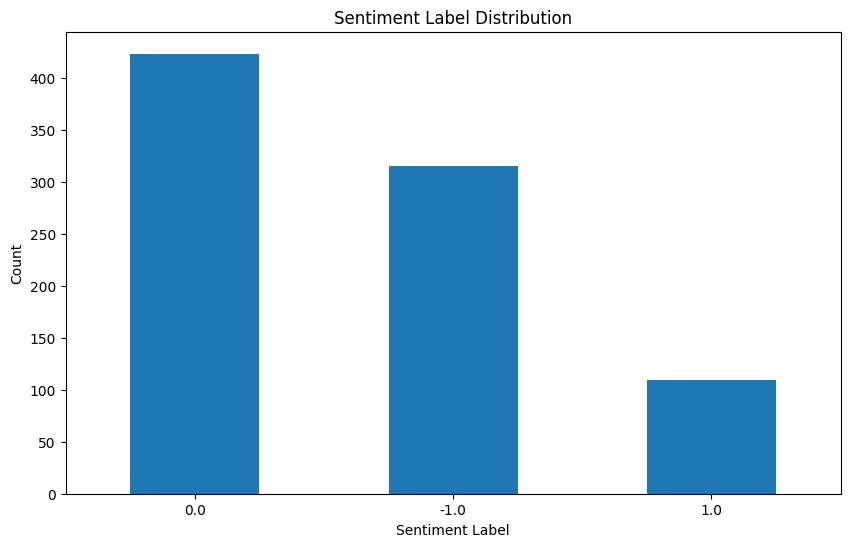

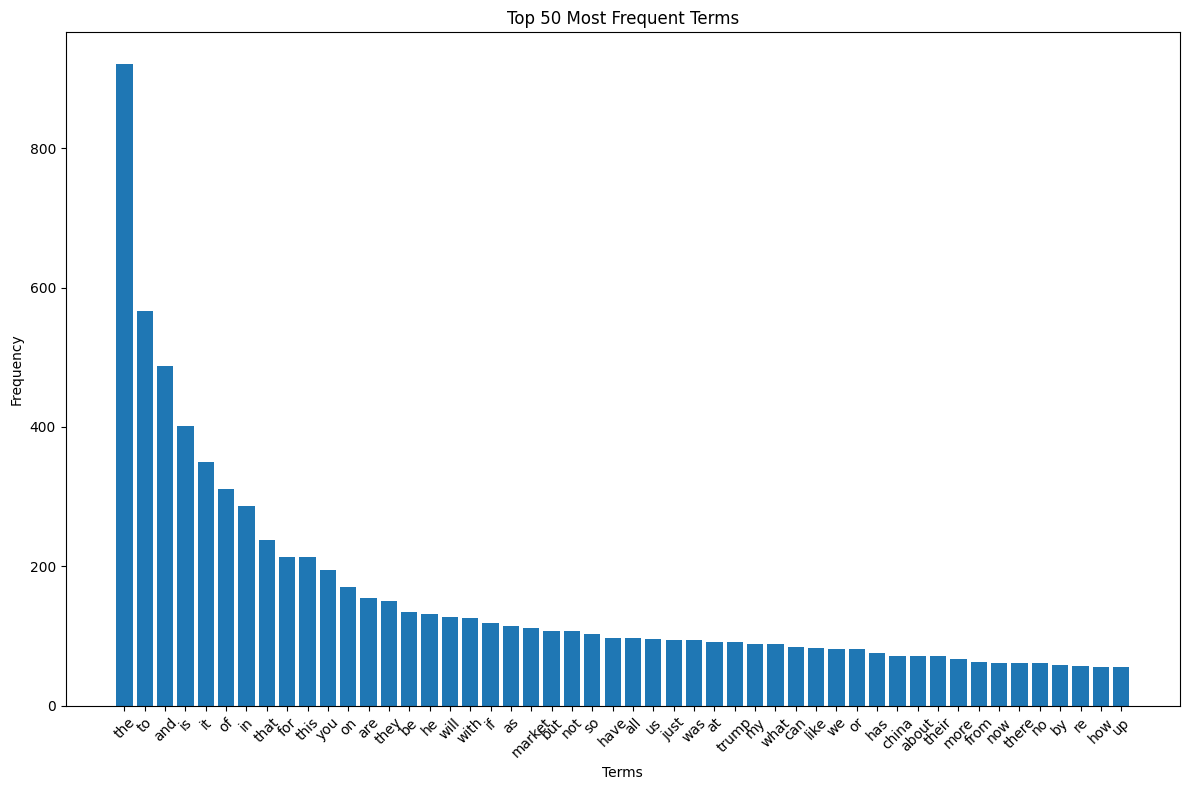

In [11]:
## 5. Data Visualization
# 1. Label distribution visualization
plt.figure(figsize=(10, 6))
X['label'].value_counts().plot(kind='bar')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. Term frequency distribution (top 50 terms)
top_50_indices = np.argsort(term_frequencies)[-50:][::-1]
top_50_terms = count_vect.get_feature_names_out()[top_50_indices]
top_50_freqs = term_frequencies[top_50_indices]

plt.figure(figsize=(12, 8))
plt.bar(range(len(top_50_terms)), top_50_freqs)
plt.title('Top 50 Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(range(len(top_50_terms)), top_50_terms, rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Interactive term frequency chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=top_50_terms,
        y=top_50_freqs,
        marker=dict(
            color=top_50_freqs,
            colorscale='Viridis',
            showscale=True
        ),
        hovertemplate='<b>Term:</b> %{x}<br><b>Frequency:</b> %{y}<br><extra></extra>'
    )
])

fig.update_layout(
    title="Interactive Term Frequency Analysis (Top 50)",
    xaxis=dict(title="Terms", tickangle=45),
    yaxis=dict(title="Frequency"),
    width=1200,
    height=600
)

fig.show()

In [ ]:
from collections import Counter
import pandas as pd

# 1. Get most frequent words by sentiment label
def get_words_by_sentiment(df, sentiment_label):
    sentiment_data = df[df['label'] == sentiment_label]
    all_words = []
    for tokens in sentiment_data['tokenized_text']:
        all_words.extend(tokens)
    return all_words

# Get words for each sentiment
positive_words = get_words_by_sentiment(X, 1.0)
neutral_words = get_words_by_sentiment(X, 0.0)
negative_words = get_words_by_sentiment(X, -1.0)

print("Word counts by sentiment:")
print(f"Positive words: {len(positive_words)}")
print(f"Neutral words: {len(neutral_words)}")
print(f"Negative words: {len(negative_words)}")

# 2. Find most distinctive words for each sentiment
def get_top_words_by_sentiment(words, top_n=20):
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

print("\nTop 20 words by sentiment:")
print("\nPositive sentiment words:")
pos_top = get_top_words_by_sentiment(positive_words, 20)
for word, count in pos_top:
    print(f"{word}: {count}")

print("\nNeutral sentiment words:")
neu_top = get_top_words_by_sentiment(neutral_words, 20)
for word, count in neu_top:
    print(f"{word}: {count}")

print("\nNegative sentiment words:")
neg_top = get_top_words_by_sentiment(negative_words, 20)
for word, count in neg_top:
    print(f"{word}: {count}")


Word counts by sentiment:
Positive words: 3617
Neutral words: 12616
Negative words: 10153

Top 20 words by sentiment:

Positive sentiment words:
.: 175
,: 120
the: 115
and: 86
to: 68
is: 66
a: 56
i: 52
in: 39
it: 38
for: 38
on: 29
with: 28
this: 28
*: 27
of: 27
’: 27
's: 26
): 24
you: 23

Neutral sentiment words:
.: 445
the: 396
,: 380
to: 266
a: 215
and: 207
*: 172
i: 166
it: 165
is: 163
of: 154
): 152
(: 151
in: 129
?: 125
that: 108
$: 99
you: 95
for: 91
this: 90

Negative sentiment words:
.: 489
the: 407
,: 248
to: 231
and: 193
is: 184
a: 167
it: 147
of: 130
i: 118
in: 117
that: 108
’: 103
this: 93
?: 93
he: 92
will: 89
for: 85
you: 77
be: 70


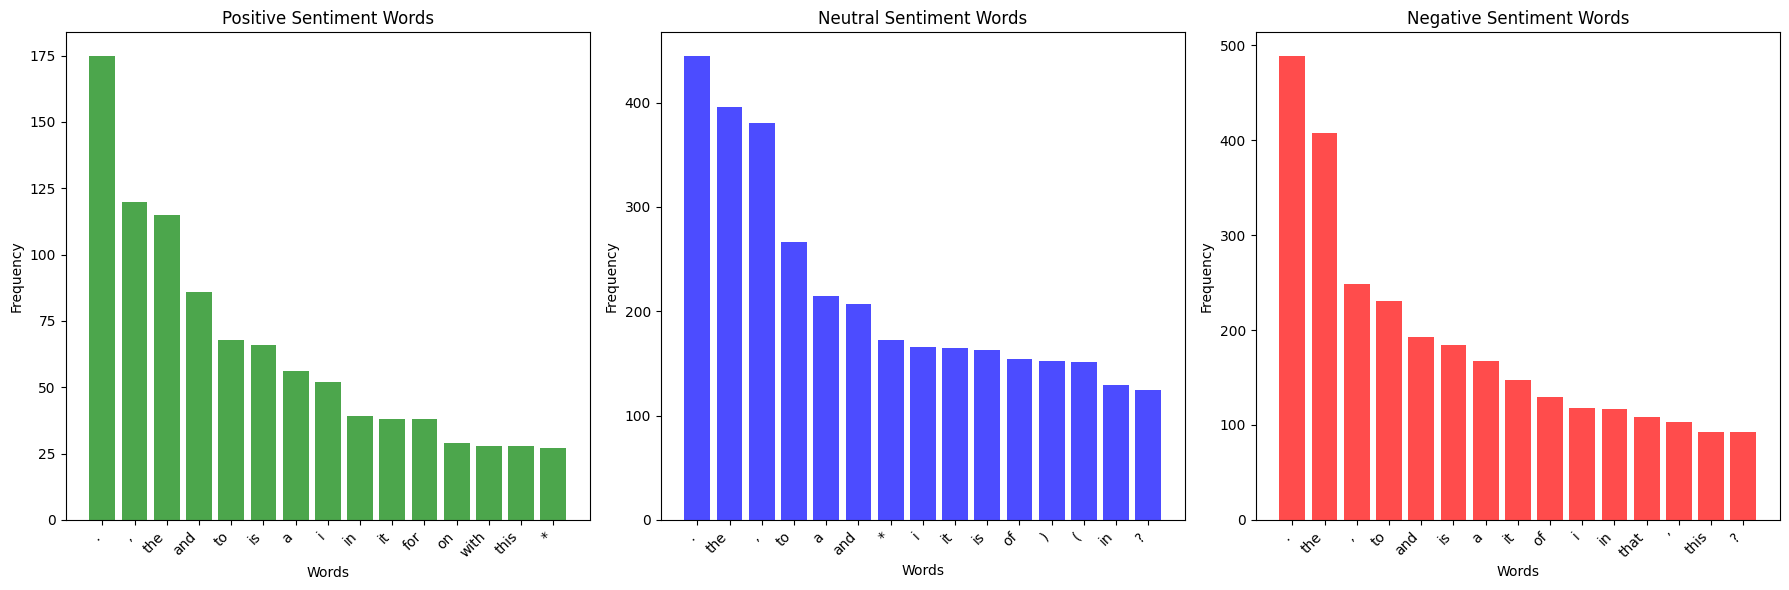

In [31]:
# 3. Visualize word frequency by sentiment
def create_sentiment_word_comparison(pos_words, neu_words, neg_words, top_n=15):
    """Create comparison chart of top words by sentiment"""
    
    # Get top words for each sentiment
    pos_top = dict(Counter(pos_words).most_common(top_n))
    neu_top = dict(Counter(neu_words).most_common(top_n))
    neg_top = dict(Counter(neg_words).most_common(top_n))
    
    # Create subplot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Positive words
    words_pos = list(pos_top.keys())
    counts_pos = list(pos_top.values())
    axes[0].bar(range(len(words_pos)), counts_pos, color='green', alpha=0.7)
    axes[0].set_title('Positive Sentiment Words')
    axes[0].set_xlabel('Words')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xticks(range(len(words_pos)))
    axes[0].set_xticklabels(words_pos, rotation=45, ha='right')
    
    # Neutral words
    words_neu = list(neu_top.keys())
    counts_neu = list(neu_top.values())
    axes[1].bar(range(len(words_neu)), counts_neu, color='blue', alpha=0.7)
    axes[1].set_title('Neutral Sentiment Words')
    axes[1].set_xlabel('Words')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xticks(range(len(words_neu)))
    axes[1].set_xticklabels(words_neu, rotation=45, ha='right')
    
    # Negative words
    words_neg = list(neg_top.keys())
    counts_neg = list(neg_top.values())
    axes[2].bar(range(len(words_neg)), counts_neg, color='red', alpha=0.7)
    axes[2].set_title('Negative Sentiment Words')
    axes[2].set_xlabel('Words')
    axes[2].set_ylabel('Frequency')
    axes[2].set_xticks(range(len(words_neg)))
    axes[2].set_xticklabels(words_neg, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Create the comparison chart
create_sentiment_word_comparison(positive_words, neutral_words, negative_words, top_n=15)

In [48]:
!uv pip install wordcloud


Resolved 12 packages in 590ms                                        
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)--------------     0 B/535.09 KiB          
⠙ Preparing packages... (0/1)-------------- 16.00 KiB/535.09 KiB        
⠙ Preparing packages... (0/1)-------------- 32.00 KiB/535.09 KiB        
⠙ Preparing packages... (0/1)-------------- 48.00 KiB/535.09 KiB        
⠙ Preparing packages... (0/1)-------------- 61.47 KiB/535.09 KiB        
⠙ Preparing packages... (0/1)-------------- 77.47 KiB/535.09 KiB        
⠙ Preparing packages... (0/1)-------------- 93.47 KiB/535.09 KiB        
⠙ Preparing packages... (0/1)-------------- 109.47 KiB/535.09 KiB       
⠙ Preparing packages... (0/1)-------------- 125.47 KiB/535.09 KiB       
⠙ Preparing packages... (0/1)-------------- 141.47 KiB/535.09 KiB       
⠙ Preparing packages... (0/1)-------------- 157.47 KiB/535.09 KiB       
⠙ Preparing packages... (0/1)-------------- 17

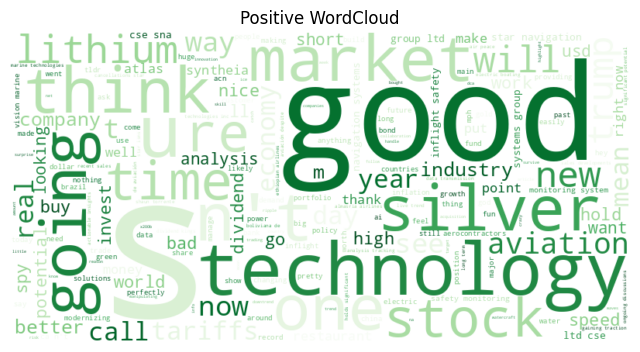

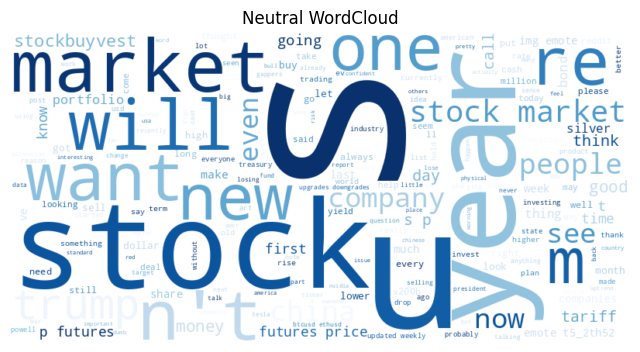

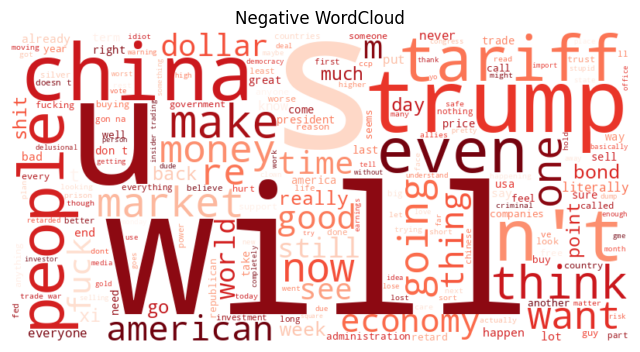

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(words, title, color):
    text = " ".join(words)
    wc = WordCloud(width=800, height=400, background_color="white", colormap=color).generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(positive_words, "Positive WordCloud", "Greens")
plot_wordcloud(neutral_words, "Neutral WordCloud", "Blues")
plot_wordcloud(negative_words, "Negative WordCloud", "Reds")


# Phase 2

In [ ]:
### Begin Assignment Here